<a href="https://colab.research.google.com/github/G0rav/Marketing_strategy/blob/main/Bank_marketing_Strategy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The [data](https://www.kaggle.com/henriqueyamahata/bank-marketing) is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

> Number of Instances: 45211

> Number of Attributes: 16 + output attribute.


The classification goal is to predict if the client will subscribe a term deposit (variable y).


# Attribute information:
   Input variables:
  
   ## bank client data:
   
   1 - age (numeric)
  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
  
   6 - balance: average yearly balance, in euros (numeric) 
  
   7 - housing: has housing loan? (binary: "yes","no")
  
   8 - loan: has personal loan? (binary: "yes","no")
  
   ## related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   ## other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# Output variable (desired target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [181]:
path = '/content/drive/My Drive/Datasets/Bank Marketing Data Set/bank-full.csv'
df  = pd.read_csv(path,sep=';')

In [182]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [184]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#EDA 

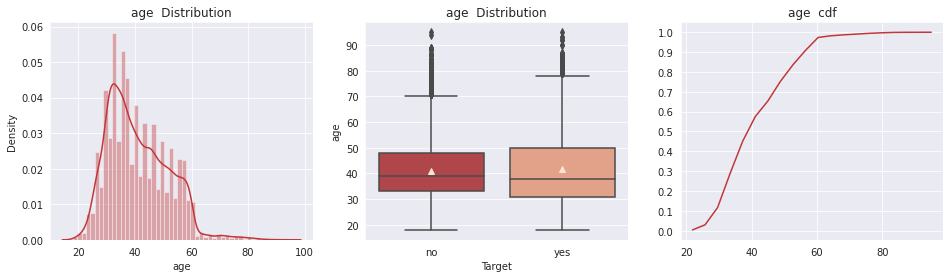

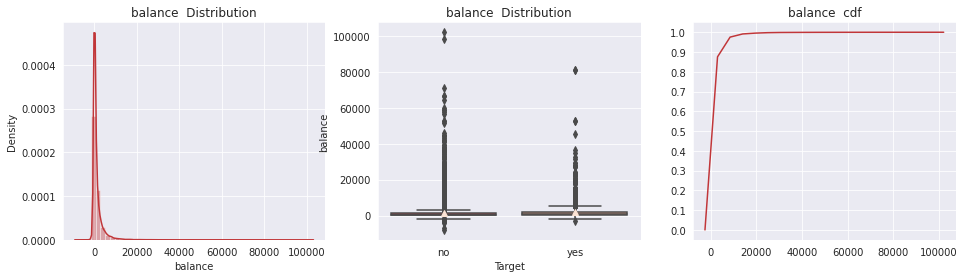

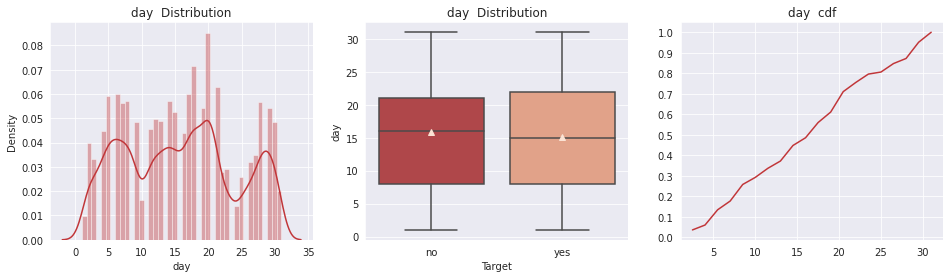

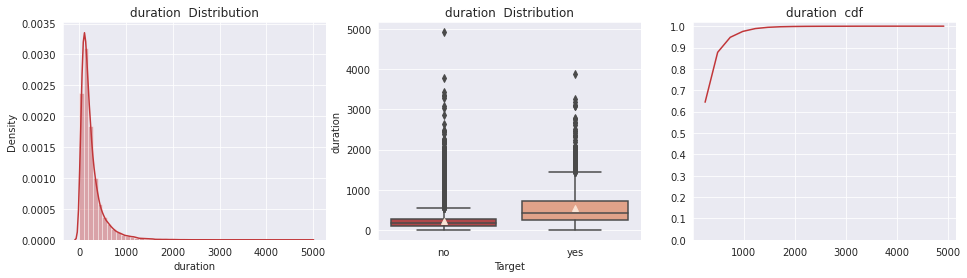

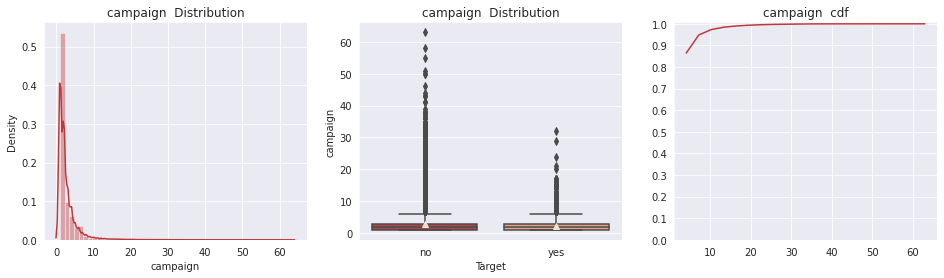

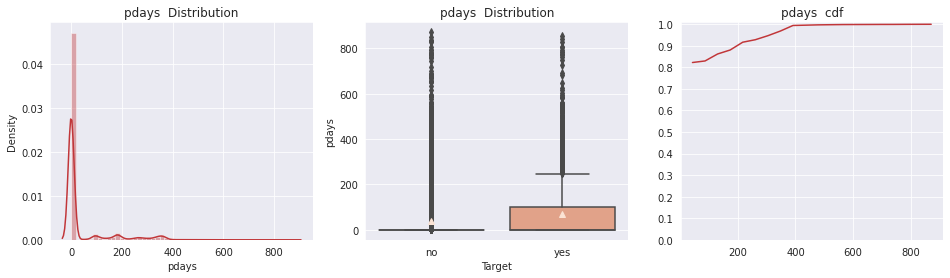

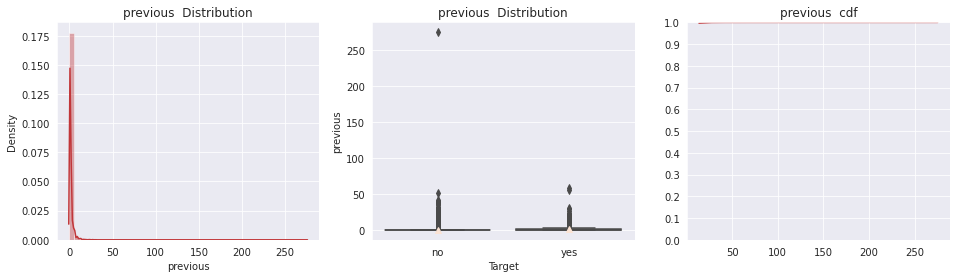

In [185]:
int_column = df.dtypes[df.dtypes == 'int64'].index

for column in int_column:
  plt.figure(figsize=(16,4))

  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.title(f'{column}  Distribution')

  plt.subplot(1,3,2)
  sns.boxplot(x='y', y=column, data =df, showmeans=True )
  plt.xlabel('Target')
  plt.ylabel(column)
  plt.title(f'{column}  Distribution')

  plt.subplot(1,3,3)
  counts, bins = np.histogram(df[column], bins=20, normed=True)
  cdf = np.cumsum (counts)
  plt.plot (bins[1:], cdf/cdf[-1])
  #plt.xticks(range(15,100,5))
  plt.yticks(np.arange(0,1.1,.1))
  plt.title(f'{column}  cdf')
  plt.show()
  print()


In [186]:
# Quantiles
for column in int_column:
  print(f'For {column}:')

  print('Min:', df[column].quantile(q = 0))
  print('1º Quartile:', df[column].quantile(q = 0.25))
  print('2º Quartile:', df[column].quantile(q = 0.50))
  print('3º Quartile:', df[column].quantile(q = 0.75))
  print('Max:', df[column].quantile(q = 1.00),'\n')

For age:
Min: 18.0
1º Quartile: 33.0
2º Quartile: 39.0
3º Quartile: 48.0
Max: 95.0 

For balance:
Min: -8019.0
1º Quartile: 72.0
2º Quartile: 448.0
3º Quartile: 1428.0
Max: 102127.0 

For day:
Min: 1.0
1º Quartile: 8.0
2º Quartile: 16.0
3º Quartile: 21.0
Max: 31.0 

For duration:
Min: 0.0
1º Quartile: 103.0
2º Quartile: 180.0
3º Quartile: 319.0
Max: 4918.0 

For campaign:
Min: 1.0
1º Quartile: 1.0
2º Quartile: 2.0
3º Quartile: 3.0
Max: 63.0 

For pdays:
Min: -1.0
1º Quartile: -1.0
2º Quartile: -1.0
3º Quartile: -1.0
Max: 871.0 

For previous:
Min: 0.0
1º Quartile: 0.0
2º Quartile: 0.0
3º Quartile: 0.0
Max: 275.0 



In [187]:
df.drop(df[df.age>65].index, inplace=True)
df.drop(df[df.balance>10000].index, inplace=True)
df.drop(df[df.duration>1000].index, inplace=True)
df.drop(df[df.campaign>10].index, inplace=True)
df.drop(df[df.pdays>400].index, inplace=True)

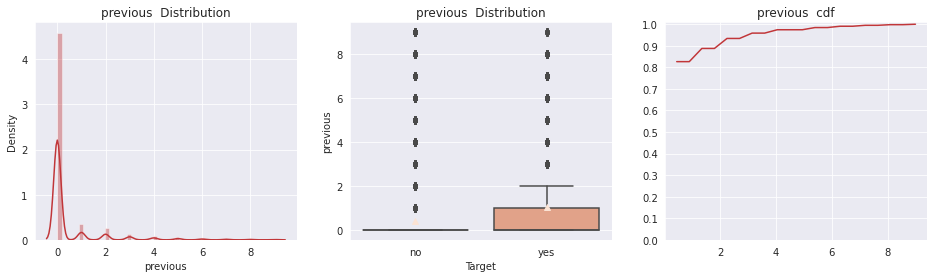

In [188]:
data = df[df['previous']<10]
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.distplot(data['previous'])
plt.xlabel('previous')
plt.ylabel('Density')
plt.title(f'previous  Distribution')

plt.subplot(1,3,2)
sns.boxplot(x='y', y='previous', data =data, showmeans=True )
plt.xlabel('Target')
plt.ylabel('previous')
plt.title(f'previous  Distribution')

plt.subplot(1,3,3)
counts, bins = np.histogram(data['previous'], bins=20, normed=True)
cdf = np.cumsum (counts)
plt.plot (bins[1:], cdf/cdf[-1])
#plt.xticks(range(15,100,5))
plt.yticks(np.arange(0,1.1,.1))
plt.title(f'previous  cdf')
plt.show()

In [189]:
df.drop(df[df.previous>10].index, inplace=True)
df.y.value_counts()

no     36962
yes     4049
Name: y, dtype: int64

##For object type

In [190]:
dfgrouped = df.groupby('y')

In [191]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

  sns.set_style(palette_style)
  sns.set_palette(palette_color)

  plt.barh(array.index, width = array.values, height = .5)
  plt.yticks(np.arange(len(array)))
  plt.xticks( range(0, round(max(array)) +bias, incrementer ))

  for index, value in enumerate(array.values):
    plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

  #plt.show()
  return plt

In [192]:
def feature_perc(feature,groupby= 'yes'):

  count = dfgrouped.get_group(groupby)[feature].value_counts()
  total_count = df[feature].value_counts()[count.index]

  perc = (count/total_count)*100
  return perc 

In [193]:
obj_column = df.dtypes[df.dtypes == 'object'].index
obj_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

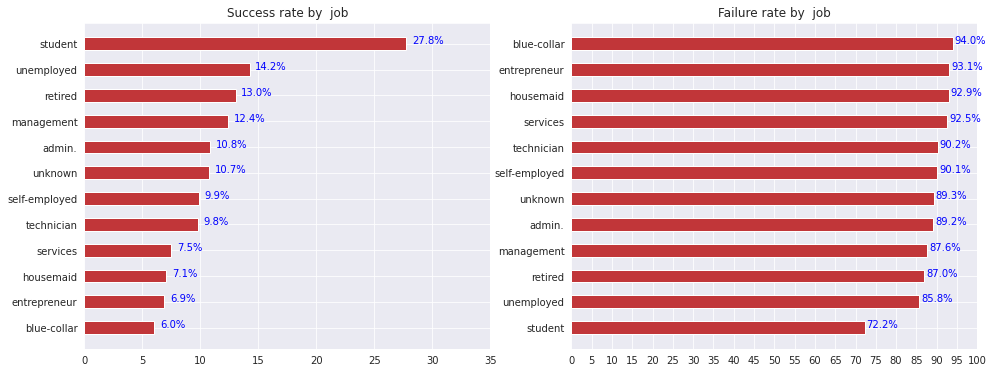

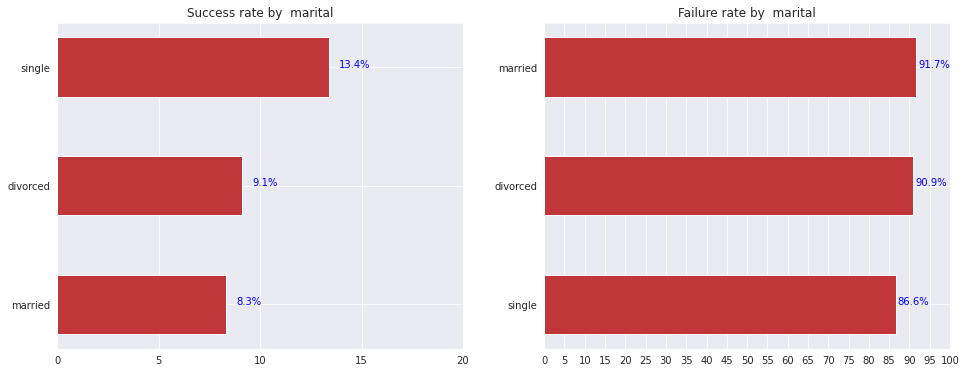

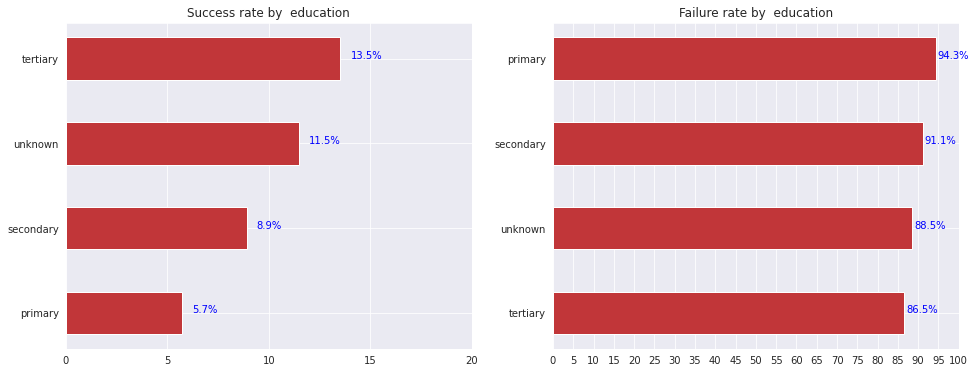

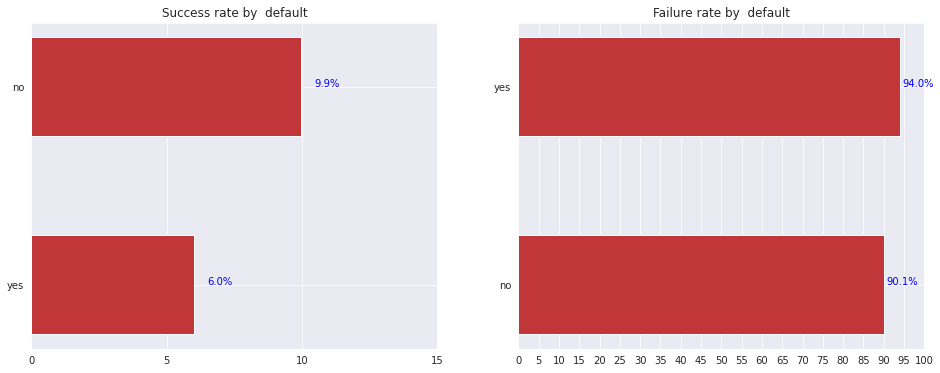

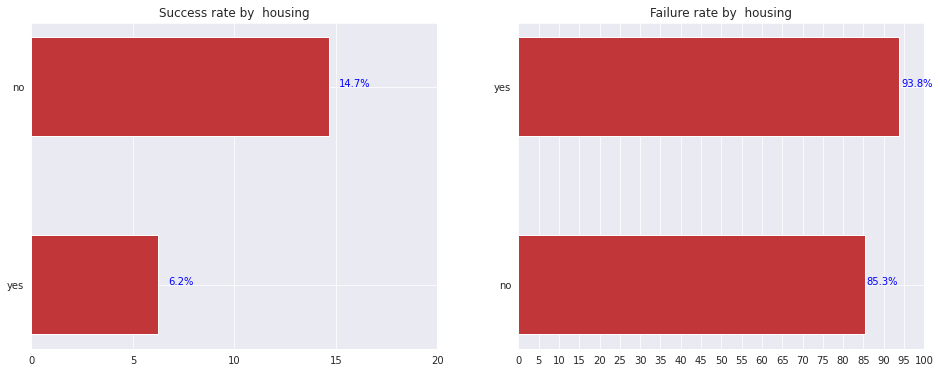

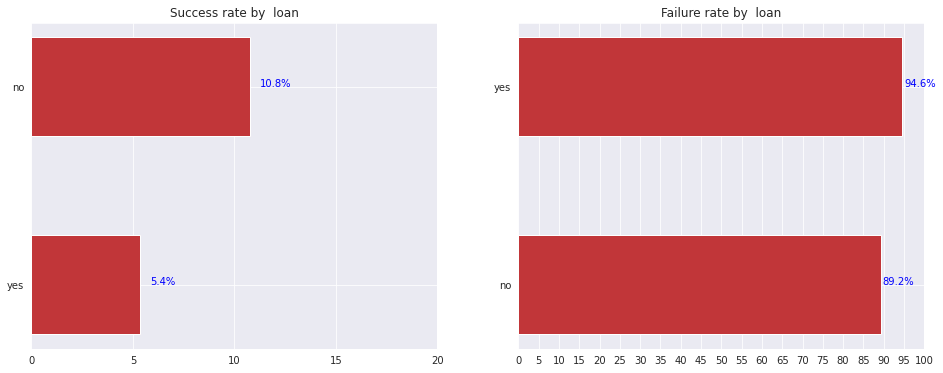

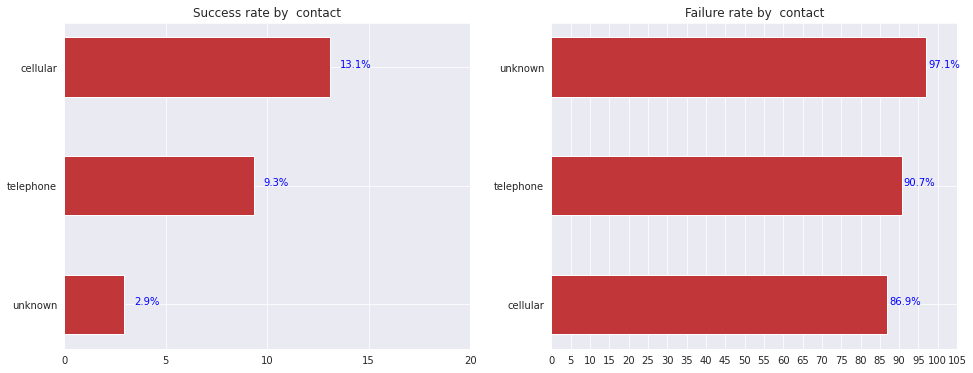

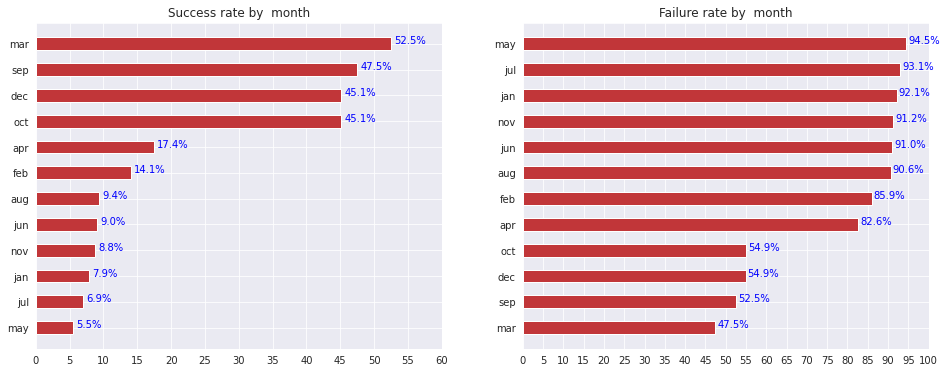

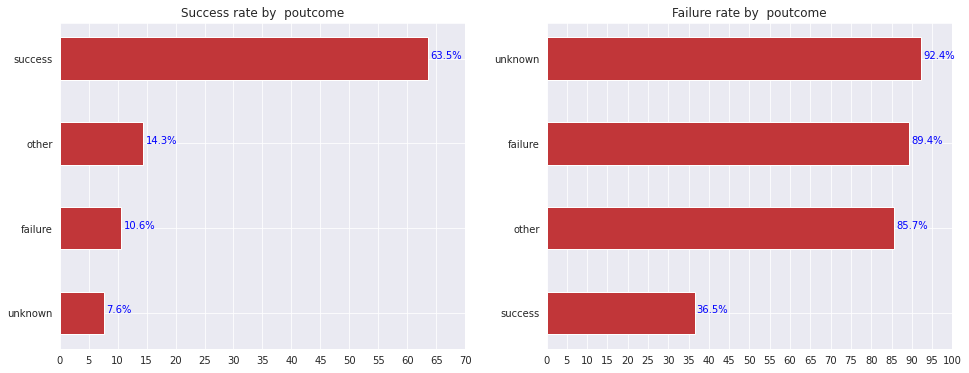

In [194]:
for column in obj_column[:-1]:

  yes_perc = feature_perc(column, groupby='yes')
  no_perc = feature_perc(column, groupby='no')

  plt.figure(figsize=(16,6))

  plt.subplot(1,2,1)
  plt.title(f'Success rate by  {column}')
  plot_barh(yes_perc.sort_values(),5,10)

  plt.subplot(1,2,2)
  plt.title(f'Failure rate by  {column}')
  plot_barh(no_perc.sort_values(),5,10)
  plt.show()
  print()


##Modeling

In [221]:
df1 = df.copy()
df1['y'] = df1.y.apply(lambda x:0 if x=='no' else 1)

In [222]:
df1.y.value_counts()

0    36962
1     4049
Name: y, dtype: int64

In [223]:
from sklearn.utils import resample

# Separate majority and minority classes
df1_majority = df1[df1.y==0]
df1_minority = df1[df1.y==1]
 
# Upsample minority class
df1_minority_upsampled = resample(df1_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=36962,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df1_majority, df1_minority_upsampled])
 
# Display new class counts
df.y.value_counts()

1    36962
0    36962
Name: y, dtype: int64

In [224]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21858,40,admin.,single,tertiary,no,27,no,no,cellular,20,aug,467,2,-1,0,unknown,1
41199,45,housemaid,married,secondary,no,4068,no,no,cellular,20,aug,184,1,-1,0,unknown,1
43503,30,student,single,tertiary,no,7529,no,no,cellular,20,apr,175,6,183,1,success,1
44327,64,retired,married,secondary,no,1574,no,no,telephone,29,jul,301,3,-1,0,unknown,1


In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [225]:
obj_column = df.dtypes[df.dtypes == 'object'].index
mapingdf = pd.DataFrame()

for column in obj_column:

  labelencoder = LabelEncoder()
  df[column] = labelencoder.fit_transform(df[column])
  mapingdf[column] = df[column]
  mapingdf['_'+column] =  labelencoder.inverse_transform(df[column])


In [219]:
#for reference
#mapingdf

In [226]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [227]:
df.corr().y.sort_values()

contact     -0.287678
housing     -0.234987
campaign    -0.140778
loan        -0.128360
poutcome    -0.125167
age         -0.044686
day         -0.041679
month       -0.036743
default     -0.030869
job          0.072338
marital      0.096899
balance      0.115064
education    0.140118
pdays        0.142358
previous     0.207097
duration     0.473165
y            1.000000
Name: y, dtype: float64

In [228]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1),
                                                    df['y'],
                                                    test_size=.3, random_state = 42,
                                                    stratify= df['y'])

In [229]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [230]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier()]

names = [ 'DecisionTreeClassifier',
          'RandomForestClassifier',
          'XGBClassifier']

for model,name in zip(models,names):
  m = model.fit(X_train,y_train)
  print(name, 'report:')
  print('Train score',model.score(X_train,y_train))
  print('Test score',model.score(X_test,y_test))
  print()
  print("Train confusion matrix:\n",confusion_matrix(y_train, model.predict(X_train)),'\n')
  print("Test confusion matrix:\n",confusion_matrix(y_test, model.predict(X_test)))
  print('*'*50)


DecisionTreeClassifier report:
Train score 1.0
Test score 0.9625755252953377

Train confusion matrix:
 [[25873     0]
 [    0 25873]] 

Test confusion matrix:
 [[10268   821]
 [    9 11080]]
**************************************************
RandomForestClassifier report:
Train score 1.0
Test score 0.9747497520064929

Train confusion matrix:
 [[25873     0]
 [    0 25873]] 

Test confusion matrix:
 [[10535   554]
 [    6 11083]]
**************************************************
XGBClassifier report:
Train score 0.8589649441502725
Test score 0.861168725764271

Train confusion matrix:
 [[21351  4522]
 [ 2776 23097]] 

Test confusion matrix:
 [[9185 1904]
 [1175 9914]]
**************************************************


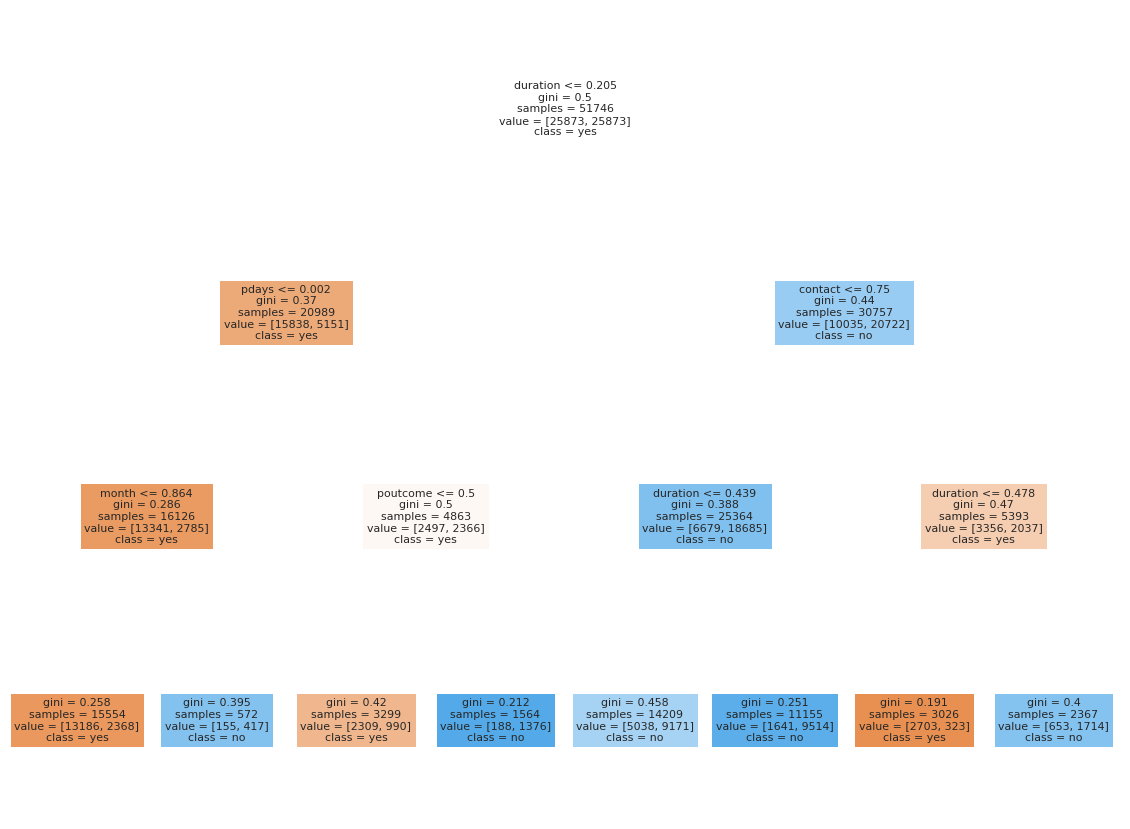

In [231]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(model,
          feature_names= df1.drop('y', axis=1).columns,  
          class_names= ['yes','no'],
          filled=True)
plt.show()